In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy
import os

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# Read Data
data = pd.read_csv('data/metadata/UrbanSound8K.csv')
#data.head(5)

In [3]:
data.shape

(34, 6)

In [4]:
# Get data over 3 seconds long
valid_data = data[['slice_file_name' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape

(28, 3)

In [33]:
# Example of a dog_bark spectrogram
y, sr = librosa.load('data/audio/train/100652-3-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
for i in y:
    print(i)
print("Sampling rate: {}".format(sr))
ps.shape

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.609858e-13
-3.3725244e-13
8.973259e-14
9.249856e-13
-3.4052863e-12
8.353109e-12
-1.7095556e-11
3.1260373e-11
-5.268398e-11
8.3230596e-11
-1.2450377e-10
1.7743788e-10
-2.4176736e-10
3.1538538e-10
-3.9362216e-10
4.6864024e-10
-5.287659e-10
5.567532e-10
-5.3156934e-10
4.2659387e-10
-2.1085496e-10
-1.5000826e-10
6.919536e-10
-1.4499761e-09
2.4547622e-09
-3.7285983e-09
5.280658e-09
-7.101596e-09
9.15948e-09
-1.1392463e-08
1.370692e-08
-1.5972411e-08
1.8020767e-08
-1.9646375e-08
2.0607928e-08
-2.0636383e-08
1.9440701e-08
-1.672134e-08
1.2183923e-08
-5.556243e-09
-3.3933731e-09
1.4834925e-08
-2.8856391e-08
4.544432e-08
-6.4463116e-08
8.564077e-08
-1.0855321

-0.04256402
-0.043034684
-0.04438535
-0.04269826
-0.045742903
-0.05405564
-0.05749187
-0.052974105
-0.04193766
-0.029875392
-0.017640885
-0.005182748
-0.0013675675
-0.0016273856
0.008900004
0.03190329
0.06207538
0.08141587
0.085751
0.07431331
0.054780584
0.0446576
0.05446797
0.074409746
0.091098584
0.09066671
0.078280285
0.06768333
0.060065757
0.05383257
0.048562147
0.036971416
0.010734494
-0.023751965
-0.06206044
-0.091027625
-0.1081836
-0.108347714
-0.09108215
-0.077084236
-0.07166005
-0.0753085
-0.07735761
-0.06226329
-0.046104085
-0.036079463
-0.03660222
-0.04756173
-0.055490028
-0.056026537
-0.047934048
-0.03704817
-0.026669217
-0.0154160485
0.0033532127
0.029472038
0.06321458
0.08853594
0.096059114
0.09318449
0.075484075
0.054009553
0.033824436
0.022930134
0.029442016
0.048995335
0.06713624
0.07083897
0.07036566
0.06987291
0.070131496
0.07251476
0.061013844
0.037925504
0.00586002
-0.024433676
-0.03295459
-0.03232645
-0.03909153
-0.05593831
-0.07370757
-0.09534218
-0.116438895
-0.

-0.0055327597
-0.0037668496
0.0015244437
-0.0020516964
-0.00517798
-0.006075636
-0.0051840595
-0.0030607998
-0.0021017548
0.0036688629
0.0037120564
0.007152932
0.00851584
0.005046265
0.0049882303
0.0024609466
0.003225326
0.0048441086
0.00579182
0.0016381065
-0.0031080262
-0.0062652747
-0.0054408517
-0.0012473055
-7.6170785e-05
0.0006576693
-0.00065040967
0.0028132556
0.0034464325
0.008024864
0.011567036
0.00654078
0.0023253278
-0.001777436
-0.0007068254
0.0011038965
0.010175106
0.0170385
0.0180114
0.017538112
0.007915384
0.0018126068
-0.002731644
-0.002763184
0.0022948433
0.0055462294
0.005779367
0.0015104002
0.0011441372
0.005703681
0.010376427
0.009295727
0.0036762692
-0.007845407
-0.014880391
-0.018143468
-0.018769579
-0.0111817885
-0.0055317893
0.000956184
0.003056766
0.0031767061
0.0028252618
-0.00068549125
-0.00013989593
-0.0017385831
-0.0023748025
-0.003917174
-0.003931583
-0.00074786413
0.003532078
0.013431721
0.014812955
0.008174087
0.001874347
-0.00077094213
2.9325836e-05
0.0

-0.012508165
-0.011195213
-0.012706996
-0.011877563
-0.0120572
-0.010530311
-0.014398845
-0.016627701
-0.016557937
-0.014680517
-0.007698423
-0.009026419
-0.007773153
-0.0081871785
-0.0107682785
-0.005982167
-0.00031248096
-0.0043587773
-0.010924698
-0.015168005
-0.016004056
-0.01738545
-0.01972606
-0.010592127
-0.00412668
-0.007586616
-0.008994266
-0.009494731
-0.011452898
-0.013743295
-0.011399412
-0.0054263957
-0.004375453
-0.0068617663
-0.007985126
-0.0013449824
-0.006103195
-0.0080190245
-0.009524884
-0.014482995
-0.011756142
-0.012397838
-0.0030396502
-0.005405674
-0.0053264466
0.0026986531
0.0020304022
0.0018789234
-0.0062304568
-0.009853535
-0.010247811
-0.012758677
-0.011097789
-0.010882717
-0.008829123
-0.0012559587
-0.0037916014
-0.0053558033
-0.0015363097
-0.0050700703
-0.0044521512
-0.011065652
-0.0029404182
0.003474468
-0.0062539377
-0.00388748
-0.0019768141
0.002139805
-0.0020701413
-0.0030167224
0.0018330036
-0.0022141398
-0.004339722
-0.003145264
0.0010080273
0.0009428

0.0012347325
0.0037572281
0.0054070023
0.0055575063
0.007225147
0.0071022105
0.008918589
0.011009027
0.010766156
0.010211905
0.00812782
0.0070269103
0.0068233935
0.0065289293
0.006186722
0.006397329
0.0088332435
0.008278887
0.004618364
0.0026022787
-0.0012560309
-0.0051747942
-0.005830884
-0.0049851486
-0.0011071124
0.0005401432
0.004132129
0.0063060634
0.0054545943
0.005794225
0.0035581635
0.0045250976
0.005406967
0.0055849007
0.005701971
0.0052610813
0.0054318
0.0026700895
0.0017998895
0.0030841918
0.00638974
0.010996578
0.014356355
0.014910996
0.011176231
0.005567352
0.0008178612
0.00079568947
-0.000433366
7.537479e-05
0.0018103628
0.0032303173
0.0061358693
0.00520354
0.0072421427
0.0071928604
0.0072609177
0.007652755
0.0068893274
0.0074225673
0.005167035
0.005142636
0.003679935
0.00299112
0.0021773549
0.0031812089
0.006503535
0.007827554
0.008526573
0.0071969205
0.0064404937
0.004920553
0.0033983013
0.0014384153
0.00095161697
0.0037711763
0.005393139
0.005706351
0.0046985084
0.0041

0.080256835
0.087576635
0.0734135
0.04684259
0.014309742
-0.019236086
-0.04650802
-0.06431438
-0.07491601
-0.083762534
-0.087265454
-0.08376081
-0.07513714
-0.059268583
-0.036084607
-0.008360243
0.017679984
0.04519106
0.08011496
0.12057496
0.15764457
0.17985953
0.17903686
0.14811443
0.08281542
-0.00033133797
-0.085748486
-0.15178971
-0.18470791
-0.1858357
-0.15797634
-0.11681087
-0.07160415
-0.030022182
0.0009870554
0.024150262
0.040700335
0.048767995
0.04769452
0.0390046
0.026756149
0.009584728
-0.0041443803
-0.013122859
-0.01904431
-0.01920943
-0.016638653
-0.00667639
0.0043922295
0.017760837
0.035047505
0.048476044
0.057171714
0.055612344
0.043088444
0.019253442
-0.014459556
-0.049330648
-0.07869737
-0.10227916
-0.11653644
-0.120366804
-0.11354784
-0.0931778
-0.060933333
-0.013281771
0.048761453
0.117710896
0.18196878
0.22411554
0.23661633
0.20856668
0.14023502
0.04439568
-0.06400788
-0.1619776
-0.23336937
-0.26239076
-0.24663389
-0.1941908
-0.11677213
-0.03236401
0.039752446
0.0874

0.031269837
-0.010068317
-0.054096695
-0.078742296
-0.0715208
-0.043349214
-0.008195795
0.02015773
0.03178115
0.023220275
0.009712556
0.008409314
0.0150426775
0.024887191
0.032859687
0.035813924
0.04218387
0.059382375
0.07236263
0.065584496
0.026958574
-0.027874338
-0.07191006
-0.08768725
-0.07317361
-0.04440978
-0.022488177
-0.021261297
-0.039009087
-0.059468854
-0.05634355
-0.016593333
0.039068587
0.07160025
0.06473384
0.01871711
-0.030703316
-0.049953897
-0.03821656
-0.007786389
0.005153501
-0.005465726
-0.027363561
-0.038504913
-0.01744945
0.026050558
0.0631344
0.072467186
0.053313203
0.01874009
-0.0031865733
-0.0019100145
0.01704051
0.034477267
0.029863006
-0.0056880023
-0.04910915
-0.08148171
-0.089525945
-0.07059949
-0.05052956
-0.03606548
-0.031583928
-0.020553147
0.0035131855
0.035214666
0.060836297
0.06308576
0.047398843
0.025275245
0.008384791
-0.0026254172
-0.010650942
-0.015188466
-0.013120179
-0.016740076
-0.025854701
-0.029271383
-0.020863114
-0.0027818826
0.01901984
0.0

-0.0030467685
0.00019609771
0.0005927043
0.0037527264
0.0019693773
0.005216935
0.014046075
0.01655275
0.016056068
0.012245704
0.006365404
-0.0007574058
-0.0026202088
-0.0022380992
-0.0044241315
-0.0050681843
-0.00940568
-0.011572851
-0.011263958
-0.009355609
-0.003101745
0.0016696252
0.00912528
0.01132614
0.012150653
0.015161276
0.016598595
0.017524438
0.005206141
-0.00623107
-0.015441492
-0.019905966
-0.014894834
-0.0051188846
0.005888015
0.00897214
0.013179922
0.014231255
0.017744966
0.015985042
0.01157663
0.004690019
-0.0037575895
-0.006302363
-0.009760248
-0.010324999
-0.0071384953
0.0028242774
0.014272723
0.018043987
0.015531887
0.014723313
0.0064298436
0.0015777096
-0.0029232677
-0.004768343
-0.001594574
-0.00027242463
0.0042812545
0.0042732004
0.0055877874
0.0003823915
-0.0040490874
-0.004623885
-0.009338477
-0.013835977
-0.014639889
-0.010647573
0.0009141039
0.014480047
0.01859433
0.016570037
0.0069241417
-0.0014851642
-0.0057146586
-0.004642459
-0.006544056
-0.002451634
0.0009

-0.0026599257
0.00249415
0.003450546
0.0051067253
0.0023068194
0.00039594926
-0.0013213101
-0.003897589
-0.008207746
-0.010958197
-0.009843458
-0.005783479
-0.007319087
-0.0071925665
-0.002960561
0.00848984
0.026308058
0.03543871
0.020781692
-0.0030187422
-0.014221674
-0.018266486
-0.007988876
-0.009065172
-0.024431415
-0.031841986
-0.019186143
0.010884946
0.040640038
0.04329548
0.01694193
-0.015606188
-0.031455692
-0.027070573
-0.013961341
0.0017053006
0.010923939
0.012136128
0.0045103366
0.0048656613
0.008351326
0.007599285
-0.00363704
-0.024658676
-0.0300355
-0.019484153
0.00428993
0.023754394
0.026049616
0.012342331
-0.004423771
-0.009694598
-0.007126819
0.0006887042
0.0018213848
0.00021629375
-0.0030944708
-0.008208954
-0.012479623
-0.014219764
-0.011214616
-0.0056966976
-0.003448475
-0.0036108233
-0.003575356
-4.3366057e-05
0.0046383017
0.007986948
0.007959166
0.0016701901
-0.0073342994
-0.01041428
-0.010855
-0.00503411
0.0039607333
0.006271001
0.0017837506
-0.0070855403
-0.00956

-0.0045720455
-0.0058487826
-0.0038520375
-0.0029660047
-0.003179276
4.9821185e-05
0.0013038996
0.0021468303
0.0029044226
0.00034647007
-0.0009370669
0.00049053517
0.0039126333
0.009503494
0.014508644
0.015405631
0.010930329
0.0067943875
0.002366754
-0.0029579464
-0.0023068704
-0.00058279926
-9.767975e-05
0.00061283214
0.0045688613
0.0047029434
0.0022664065
0.0020633154
-0.0015767732
-0.00046297204
0.002253502
0.0020896546
0.0022930691
0.0042018127
0.0021456236
-0.0017836401
0.0006899914
-0.00072076125
-0.0010774488
0.0013066143
-0.0013249445
-0.000440145
-0.0011944056
-0.00035825
0.0010603279
0.0053584734
0.005388877
0.0021948772
0.0061480384
0.0015239631
0.0017438475
0.0016322911
0.0028191837
0.002706029
0.002999995
0.010192546
0.0074846344
0.008203754
0.0068907863
0.0021868115
0.0021948444
0.0011636567
0.004060863
0.0030386995
0.00552144
0.003040603
-0.00031202653
-0.0007666125
-0.006188902
-0.006912413
-0.0073765456
-0.0052770367
-0.008285441
-0.0055484283
-0.0030293907
-0.00053401

-0.061192434
-0.20320447
-0.30100346
-0.3446205
-0.31760192
-0.23545472
-0.10569833
0.07244169
0.25201097
0.36164623
0.37650883
0.30724442
0.15192896
-0.028546596
-0.13566387
-0.1606738
-0.12657462
-0.0705744
-0.03195386
-0.0025369332
0.016459312
0.011613154
0.008888916
0.023805054
0.02393687
0.00075189123
-0.023999164
-0.053460184
-0.10113463
-0.13965228
-0.1484523
-0.12386093
-0.05651942
0.02819974
0.14049478
0.25001583
0.29761386
0.25951356
0.14045434
-0.0037387002
-0.11344654
-0.16352838
-0.15804441
-0.12601167
-0.09208964
-0.06886914
-0.064372756
-0.040136684
-0.01477094
0.018989475
0.072523266
0.1296954
0.16235471
0.16553181
0.13292658
0.06591899
0.004479586
-0.037407063
-0.06703038
-0.09089533
-0.12233854
-0.14863811
-0.11643801
-0.051107567
0.032553747
0.11326375
0.12622897
0.04260392
-0.08917685
-0.1900847
-0.18780342
-0.103527546
0.024237711
0.17180836
0.2589115
0.24355891
0.15855591
0.06260463
-0.011384316
-0.057481218
-0.061600603
-0.037397098
-0.009778133
-0.0055072294
-0.

0.054880258
0.06380065
0.051579256
0.028995719
-0.0051293643
-0.024480944
-0.030215897
-0.028937912
-0.0363389
-0.042880666
-0.029017067
-0.016952695
0.009363829
0.03775782
0.039070934
0.03928369
0.0302131
0.008060476
-0.010776596
-0.024720786
-0.044594217
-0.046612572
-0.032157227
-0.030417582
-0.013829866
0.0047630374
0.023478143
0.042710263
0.048402287
0.022752294
-0.011364185
-0.030161623
-0.056857288
-0.063014776
-0.05516398
-0.042899948
-0.027336288
0.0027942539
0.023269055
0.022756128
0.024406012
0.013270573
0.0075470055
0.0048218975
-0.004743579
-0.025627708
-0.0222773
-0.0071413345
0.006856806
0.046914417
0.062368646
0.056706585
0.044581648
0.020581786
-0.003968262
-0.017442534
-0.023437811
-0.032632
-0.022478761
-0.005959568
-0.011695637
-0.016015876
-0.012403207
-0.0054026307
0.0074027046
0.0057497323
-0.01424903
-0.034140363
-0.044821355
-0.04745255
-0.02579031
0.011815785
0.03689411
0.052248884
0.057311803
0.027666591
-0.0056672464
-0.011304523
-0.011116427
0.012195203
0.0

-0.009279636
-0.0029073432
0.0061176643
0.010539031
0.012904682
0.0140793435
0.014187981
0.014118781
0.0104576275
0.006920114
-0.0012288621
-0.0069968984
-0.010576354
-0.014175976
-0.008226653
-0.0058376235
-0.0040545887
-0.0027297954
-0.0043891193
-0.003157392
-0.0039339215
-0.0018279763
1.506439e-05
0.0018080635
0.0031355782
0.00022581029
-0.00012540429
0.001804644
0.0015210111
0.00451654
0.007266883
0.0049980227
0.0051394664
0.0035062789
0.0043051583
0.0018677526
-0.0011008335
-0.0014201562
-0.0021456971
0.0032615208
0.002409178
0.006544759
0.0050900625
0.0008743724
0.0025991576
-0.0011982338
0.0012701976
-4.3471387e-05
0.0027519467
0.005263563
0.004890531
0.0038012771
-0.0014854114
-0.0027270077
-0.0035111825
-0.0018633353
-0.0024171683
0.0015451716
0.0032835398
0.004112935
0.0052049947
0.0019727186
0.0015272547
-0.0023666944
-0.004257552
-0.007133192
-0.005568194
-0.0050361226
-0.0037478702
0.0004922362
-0.00081626716
0.0045970078
0.0048365737
0.0055664903
0.0047113835
0.001717237

0.0020562673
-7.044383e-06
-0.0031047878
-0.0049121813
-0.0063648825
-0.0097703785
-0.011217368
-0.015727418
-0.016231408
-0.010743254
-0.004605956
0.0023827676
0.008709199
0.012068807
0.009279607
0.0024649044
-0.003795782
-0.0058663012
-0.0017922694
0.005800658
0.010411887
0.011125272
0.0111500835
0.010759488
0.008236549
0.00665646
0.0022622226
-0.0041660094
-0.0066445307
-0.008486112
-0.0045170123
0.004604462
0.01021874
0.009537303
0.0049057
-0.0019470744
-0.0075337705
-0.0069967606
-0.0021986077
-0.0004436628
0.0007155989
0.0014683028
-0.0017296014
-0.0035599053
-0.0039452417
-0.0021566006
0.0022042869
0.0047632903
0.007903383
0.011567921
0.010421761
0.0065265284
0.0043201284
0.0041559646
0.0032511237
0.0019482293
-0.0013855994
-0.0052076546
-0.0078351395
-0.00568995
0.0015007555
0.007950638
0.009042574
0.0071302066
0.008562636
0.009498291
0.009231225
0.00866863
0.008874123
0.007903919
0.01070674
0.013194506
0.010812037
0.0065052137
-0.00064969924
-0.0028348828
-0.005876071
-0.00850

-0.0074755256
-0.008409254
-0.008750666
-0.009696238
-0.012946409
-0.013514345
-0.009831683
-0.0056408774
-6.7892186e-05
0.0010813463
-0.000741811
-0.004464981
-0.009100228
-0.012949551
-0.013100161
-0.013557875
-0.014506179
-0.015738558
-0.015490292
-0.0143392915
-0.013803723
-0.010942291
-0.008268233
-0.0037512758
-0.0017772025
0.0007314925
0.005030116
0.010948989
0.017933581
0.01932004
0.018525092
0.016498199
0.0154594965
0.015108383
0.01226823
0.006779054
0.002134633
-0.0026969947
-0.008603594
-0.014948826
-0.019502385
-0.021949224
-0.022184873
-0.020510782
-0.02168353
-0.022524018
-0.02104531
-0.014841844
-0.006842204
0.0009931742
0.0039224937
0.0021591096
0.00018449663
-0.00034838368
0.0021588285
0.008233675
0.013840845
0.016071545
0.016646324
0.015755834
0.014448086
0.012234457
0.011923559
0.008855504
0.0036277596
0.0012902071
0.0017211102
0.002254551
0.0023753515
0.0034947249
0.0028498953
-0.0003270518
-0.0036696023
-0.007274617
-0.010928079
-0.01435736
-0.017627519
-0.01873925

-0.14591916
-0.104908936
-0.101410575
-0.10855589
-0.111651786
-0.103598475
-0.08378423
-0.06854047
-0.06678713
-0.09259163
-0.1203327
-0.13483602
-0.12190127
-0.058047578
0.051425796
0.16130318
0.21738988
0.18328482
0.055519067
-0.099631816
-0.17999963
-0.12800027
0.050521173
0.30015466
0.53575456
0.6216562
0.5051938
0.22860137
-0.11101665
-0.3951705
-0.5360182
-0.49790445
-0.32441333
-0.09541542
0.07377836
0.14671746
0.13464834
0.083898745
0.03084422
-0.025432834
-0.08393608
-0.14555763
-0.20498793
-0.23891513
-0.21356165
-0.13602093
-0.021933654
0.09162813
0.15410765
0.16075648
0.111819796
0.05512271
0.04437869
0.08041956
0.16720726
0.27007532
0.3380705
0.33930203
0.26323974
0.09936206
-0.086037
-0.24715376
-0.36298278
-0.39970937
-0.366142
-0.26948658
-0.14007714
0.0030661507
0.13364953
0.22759703
0.24567348
0.16584331
-0.00037232137
-0.21127725
-0.3682718
-0.40875164
-0.31669506
-0.112671874
0.13635704
0.3339629
0.41657758
0.38753957
0.26140463
0.098977804
-0.045191888
-0.11717053

0.006379914
-0.004112543
-0.010003071
-0.011407783
-0.008053259
-0.009163102
-0.019069625
-0.03319113
-0.045670107
-0.047685917
-0.04094489
-0.027059434
-0.0019673423
0.017956503
0.022422759
0.025661219
0.032754015
0.041283853
0.0511056
0.059180096
0.06130387
0.047263507
0.021450529
-0.006784164
-0.026079377
-0.027253771
-0.019202027
-0.010102619
-0.0036478608
-0.005406593
-0.014470971
-0.01366002
-0.0016273028
0.015388415
0.027909774
0.024352556
0.0066366694
-0.018290998
-0.039488245
-0.0463108
-0.032273136
-0.010676647
0.0010818915
-0.0045492323
-0.023888893
-0.038945407
-0.03748905
-0.012396865
0.025523592
0.056879364
0.06918694
0.055186957
0.024297193
-0.011846031
-0.03194441
-0.024833364
-0.0011478326
0.020409392
0.026940264
0.022137057
0.015145442
0.010194618
0.008168771
0.0084250625
0.0069439816
0.0014516055
-0.012534053
-0.027172498
-0.031017182
-0.025839536
-0.01132493
0.0019802505
0.0013406421
-0.014874515
-0.037303578
-0.04928437
-0.044753287
-0.018378615
0.0151848085
0.0419

0.009170275
0.0077445125
0.0039373804
-0.00068886473
-0.003179511
-0.0022486323
-0.0010413593
0.00077564246
0.0023505008
0.002959065
0.0008474713
-0.0034052345
-0.0055904053
-0.0059620608
-0.0031487362
0.0035372071
0.0101616215
0.013323227
0.013737493
0.0097613055
0.0017693979
-0.0059192367
-0.011792818
-0.014614172
-0.012997627
-0.00663647
-0.00038098122
0.0046872376
0.0078415265
0.008055133
0.0074899257
0.005604058
0.0039606914
0.0024984446
-0.0012905537
-0.0039706314
-0.0048583383
-0.003963151
-0.0022075018
-0.0029584132
-0.0044345767
-0.0055702594
-0.0055178963
-0.002498083
0.0038789287
0.009551753
0.014156618
0.014516137
0.009627154
0.003703724
-0.003660721
-0.01014705
-0.013088128
-0.0101707615
-0.004232095
0.00086685823
0.0030796162
0.0020085655
-0.0014332401
-0.003954728
-0.0045688725
-0.0042265444
-0.0015276356
0.0011979118
0.002771993
0.0041049356
0.004683102
0.003589409
0.0014258656
-0.0023763694
-0.0067205313
-0.012026169
-0.014466013
-0.009738174
-0.0027497993
0.0051302626

0.0006891442
0.002227234
0.0038217604
0.0032511614
0.0012547467
-0.00019670601
-0.0014323617
-0.0016885378
-0.00013148328
0.0012765961
0.0024937007
0.0030057582
0.0034861076
0.0039902693
0.0016023131
-0.0015610963
-0.003170199
-0.0024231167
-0.00079119945
0.00058445556
0.002846915
0.0039686975
0.0036522374
0.0025985388
0.0024846834
0.002973289
0.003276129
0.0031388921
0.0022345397
0.0009676783
-5.914851e-06
0.0014221893
0.0027616415
0.0021569508
0.0010925961
0.0007877899
0.00030656662
-0.000107901804
0.00040380142
0.0020076395
0.002739231
0.0032705602
0.0044094436
0.0045820307
0.0024004905
-0.000507688
-0.0022981868
-0.0026794276
-0.0011921477
-0.00037255193
0.00041683012
0.00038343552
0.00049815077
8.407302e-06
-0.0005072882
-0.00075206056
-0.0013536626
-0.00011051441
0.00034636937
1.818329e-05
-0.0010770223
-0.0017994698
-0.0007887026
0.000105870604
0.0010059095
0.0019972539
0.0017347977
-0.00023226741
-0.0020535428
-0.0027508026
-0.0016932338
-0.00066528236
0.0014121508
0.003789886


-0.0031541714
-0.0021953785
6.111753e-07
0.002206234
0.004215919
0.0052130884
0.0052108327
0.0041013057
0.0017699747
-0.00078148406
-0.0028018677
-0.0037692634
-0.0035819563
-0.0035035063
-0.003894091
-0.0027409594
-0.0010969675
0.0001643663
0.002230025
0.004740739
0.0067784563
0.007419043
0.0066719493
0.0041320985
0.0012662071
-0.0010963078
-0.0019867497
-0.0017483665
-0.0007373448
0.0006486767
0.000827895
0.001231344
0.0018799669
0.0032892989
0.0033704473
0.0021522539
0.001641297
0.00019161128
-0.0014727525
-0.0031439192
-0.0048114564
-0.005683492
-0.0061064134
-0.006327481
-0.0064816745
-0.0064596585
-0.006307464
-0.0062871994
-0.006293459
-0.005337768
-0.0034106176
-0.0020795222
-0.0008963411
-0.00030863352
-0.0016258864
-0.0021023871
-0.0023839313
-0.0029016715
-0.0032912195
-0.0042252783
-0.0050132587
-0.004864227
-0.0029193326
-2.049725e-05
0.0032669483
0.005416912
0.006223974
0.0054326174
0.0040692566
0.0014172457
-0.0015675854
-0.0034967274
-0.005170963
-0.0067068716
-0.006874

0.16883852
0.29069245
0.3912935
0.4489963
0.43213606
0.33189887
0.16878028
-0.0054192175
-0.1511106
-0.25126943
-0.29303265
-0.27372038
-0.20273925
-0.100219496
0.0039426954
0.061481543
0.07206754
0.054085158
0.0054478017
-0.04605807
-0.079505116
-0.09569007
-0.0895845
-0.06646474
-0.048373047
-0.042836588
-0.0618918
-0.095212504
-0.1225925
-0.1441387
-0.1497519
-0.12649982
-0.056237005
0.059803132
0.21477827
0.37391454
0.48285174
0.5109706
0.4530959
0.34559122
0.20494024
0.044239264
-0.117215894
-0.2582848
-0.3562815
-0.40509564
-0.38623637
-0.30729556
-0.1970339
-0.089048386
-0.0022236626
0.05066056
0.06412149
0.04444535
0.0040097577
-0.025978813
-0.046707213
-0.06349593
-0.07289967
-0.0734279
-0.06483317
-0.04652958
-0.026427293
-0.013570608
0.014044754
0.054933842
0.113147885
0.18882616
0.27612522
0.36991748
0.42732942
0.43143675
0.36683163
0.2308129
0.051767122
-0.12787683
-0.27941254
-0.3796849
-0.40283695
-0.36780742
-0.30343685
-0.24141397
-0.18900551
-0.14694934
-0.119939804
-

0.021066327
0.015325945
0.008580012
0.0010037096
-0.0075437604
-0.013628944
-0.017827872
-0.016790748
-0.011726613
-0.0038303654
0.0054334938
0.013421607
0.020226069
0.022147713
0.019013112
0.014807012
0.011175284
0.007824217
0.0028620393
-0.004551291
-0.012401589
-0.018412301
-0.020735854
-0.024163425
-0.024632065
-0.018481385
-0.011501719
-0.0013923964
0.008626936
0.015768303
0.022146188
0.023192544
0.020268336
0.015649298
0.0067278114
-0.0026130015
-0.008764776
-0.012451436
-0.013961381
-0.011916488
-0.009115751
-0.005458509
0.00087135896
0.0036658414
0.0040379856
0.0040599415
0.0025016791
0.0056511993
0.011784396
0.01617497
0.016366383
0.013159624
0.0050422945
-0.007661121
-0.020200234
-0.032938313
-0.03691307
-0.03185932
-0.019783072
-0.0028628064
0.008165783
0.0131437965
0.015297669
0.017605018
0.018682076
0.018508174
0.016171338
0.01024883
0.0056793625
0.004634811
0.0045461464
0.0017625156
-0.00057380897
-0.0046855975
-0.011819746
-0.01969368
-0.026139105
-0.025477186
-0.0179426

0.018906299
0.015703
0.0135156475
0.013565854
0.014479652
0.016915472
0.018295074
0.017376034
0.016671108
0.014109113
0.010918869
0.009430294
0.008838157
0.00947573
0.010117776
0.011738988
0.012891993
0.014317297
0.014638529
0.0140405195
0.014834363
0.013334477
0.011661817
0.010073054
0.009454206
0.009754598
0.009558185
0.011809597
0.013248727
0.013941251
0.015739894
0.015635215
0.015320671
0.014459401
0.012778545
0.010633561
0.007661868
0.005446251
0.003695476
0.0048519047
0.0076884874
0.011095687
0.014400893
0.01589047
0.015081345
0.011739628
0.0074649374
0.003522723
0.001128202
0.0016579083
0.004133005
0.00685339
0.0104796095
0.011388492
0.010967402
0.009693798
0.0080770245
0.008788962
0.009194934
0.009341103
0.007599239
0.006383252
0.0071356236
0.008241519
0.009711076
0.009522943
0.007512341
0.0041057044
0.0005352506
-0.0003888757
0.00028403226
0.0024935806
0.0057161986
0.0080893
0.0099941855
0.009434553
0.008095612
0.005774942
0.0017318127
-0.0020395736
-0.0048499703
-0.005134189


(128, 128)

In [6]:
ipd.Audio(y, rate=sr)

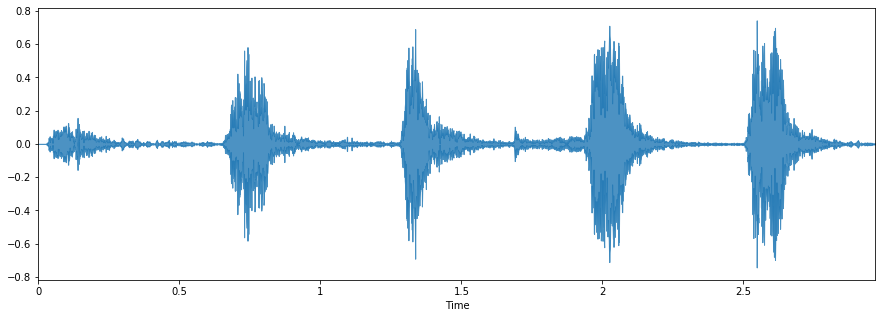

In [7]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr, alpha=0.8)

Text(0.5, 0, 'Frequency (Hz)')

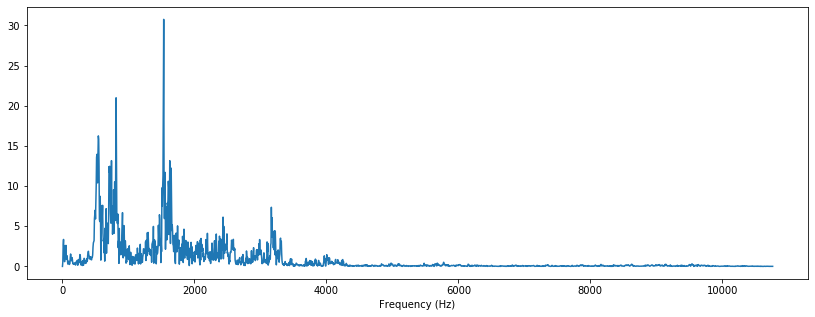

In [8]:
X = scipy.fft(y[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

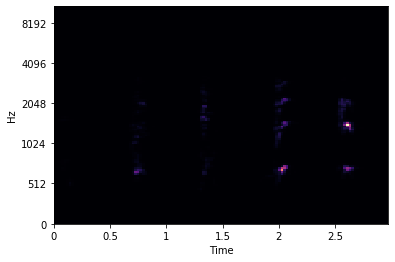

In [9]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Iterate over all samples in _valid_.
For every sample, construct the (128,128) spectrogram

In [10]:
valid_data['path'] = valid_data['slice_file_name'].astype('str')
#print(valid_data)

In [11]:
D = [] # Dataset

for row in valid_data.itertuples():
    #print(row)
    y, sr = librosa.load('data/audio/train/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [12]:
print("Number of samples: ", len(D))

Number of samples:  28


In [13]:
dataset = D
random.shuffle(dataset)
train = dataset[:20]
test = dataset[20:]

In [14]:
X_train, y_train = zip(*train)
X_test, y_test = zip(*test)
y_train_classes = y_train

In [15]:
# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])
print(X_train.shape)
# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 5))
y_test = np.array(keras.utils.to_categorical(y_test, 5))
y_encoded_classes = y_train
# print(y_train_classes)
# print(y_encoded_classes)

(20, 128, 128, 1)


In [16]:
visited = []
labels = {0:'air_conditioner',1:'car_horn',2:'children_playing',3:'dog_bark', 4:'heart_sound'}
encoded_map = {}
print(y_train_classes)
for i in range(len(y_train_classes)):
    if(i not in visited):
        type(y_encoded_classes[i])
        encoded_map[labels[y_train_classes[i]]] = [int(j) for j in y_encoded_classes[i]]
        visited.append(y_train_classes[i])
#print(encoded_map)

(0, 3, 2, 4, 4, 3, 4, 3, 2, 2, 2, 0, 3, 4, 4, 0, 3, 2, 0, 2)


# Create model

In [17]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

W0911 00:51:41.745791 139903419426624 deprecation_wrapper.py:119] From /home/asitha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 00:51:41.770876 139903419426624 deprecation_wrapper.py:119] From /home/asitha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 00:51:41.775259 139903419426624 deprecation_wrapper.py:119] From /home/asitha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0911 00:51:41.808512 139903419426624 deprecation_wrapper.py:119] From /home/asitha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0911 0

# Train

In [18]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0911 00:51:42.204857 139903419426624 deprecation_wrapper.py:119] From /home/asitha/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0911 00:51:42.275819 139903419426624 deprecation_wrapper.py:119] From /home/asitha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0911 00:51:42.365889 139903419426624 deprecation.py:323] From /home/asitha/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20 samples, validate on 8 samples
Epoch 1/12
20/20 [==============================] - 2s 94ms/step - loss: 6.1746 - acc: 0.2000 - val_loss: 4.0370 - val_acc: 0.2500
Epoch 2/12
20/20 [==============================] - 0s 10ms/step - loss: 5.0506 - acc: 0.2500 - val_loss: 2.4681 - val_acc: 0.6250
Epoch 3/12
20/20 [==============================] - 0s 10ms/step - loss: 5.1304 - acc: 0.3000 - val_loss: 2.2719 - val_acc: 0.6250
Epoch 4/12
20/20 [==============================] - 0s 9ms/step - loss: 4.0326 - acc: 0.4000 - val_loss: 1.9490 - val_acc: 0.6250
Epoch 5/12
20/20 [==============================] - 0s 10ms/step - loss: 4.4730 - acc: 0.5000 - val_loss: 1.5221 - val_acc: 0.7500
Epoch 6/12
20/20 [==============================] - 0s 9ms/step - loss: 3.6858 - acc: 0.5500 - val_loss: 0.9726 - val_acc: 0.7500
Epoch 7/12
20/20 [==============================] - 0s 10ms/step - loss: 2.5823 - acc: 0.5000 - val_loss: 0.6520 - val_acc: 1.0000
Epoch 8/12
20/20 [========================

In [19]:
model.save('hsv_cnn.hdf5')

# Test

In [20]:
T = [] # Dataset

test_folder = os.listdir(".//data//audio//test")
#print(test_folder)
for sound_file in test_folder:
    #print(row)
    y, sr = librosa.load('data/audio/test/' + sound_file, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    #print(ps.shape)
    if ps.shape != (128, 128): continue
    T.append( ps )

In [21]:
print("Number of samples: ", len(T))

Number of samples:  7


In [22]:
test_reshaped = T
test_reshaped = np.array([x.reshape( (128, 128, 1) ) for x in test_reshaped])
print(test_reshaped.shape)

(7, 128, 128, 1)


In [23]:
predict = model.predict(x=test_reshaped) 

In [24]:
y_classes = predict.argmax(axis=-1)
print(y_classes)

[4 4 4 3 4 4 3]


In [25]:
new_pred = model.predict_proba(x=test_reshaped)

In [26]:
print(new_pred)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [1.66849181e-01 5.29897697e-02 6.03758320e-02 1.74447402e-01
  5.45337856e-01]
 [1.38211846e-01 4.36079167e-02 5.04623242e-02 1.75653026e-01
  5.92064857e-01]
 [1.87136933e-01 7.15064108e-02 2.60584932e-02 6.07361495e-01
  1.07936636e-01]
 [9.16107297e-02 5.52346632e-02 4.20431159e-02 8.71260762e-02
  7.23985374e-01]
 [2.13942781e-01 1.85068056e-01 1.83198795e-01 1.90837160e-01
  2.26953208e-01]
 [6.36670971e-04 3.60413251e-04 1.67084022e-06 9.98986900e-01
  1.43427851e-05]]


In [27]:
new_predict = []
for i in range(len(predict)):
    new_predict.append([int(j) for j in np.round(predict[i])])
print(encoded_map)
predict_label = []
for i in range(len(new_predict)):
    for key, value in encoded_map.items():
        if(value == new_predict[i]):
            print("Original: {} => Prediction: {}".format(test_folder[i], key))
            break

{'air_conditioner': [1, 0, 0, 0, 0], 'dog_bark': [0, 0, 0, 1, 0], 'children_playing': [0, 0, 1, 0, 0], 'heart_sound': [0, 0, 0, 0, 1]}
Original: heartbeat-01a.wav => Prediction: heart_sound
Original: 189981-0-0-15.wav => Prediction: heart_sound
Original: 189981-0-0-16.wav => Prediction: heart_sound
Original: 207214-2-0-63.wav => Prediction: dog_bark
Original: 189981-0-0-14.wav => Prediction: heart_sound
Original: 207214-2-0-126.wav => Prediction: dog_bark
